### Import modules & Load dataset

In [1]:
# Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from typing import Tuple, Union, Any, Sequence, Dict, List
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [2]:
# Load training
train = pd.read_csv("churn-bigml-80.csv")
# View training data rows.
train.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [3]:
print('Shape of Train Data: ', train.shape)

Shape of Train Data:  (2666, 20)


In [4]:
# Displays summary information about the DataFrame
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666 entries, 0 to 2665
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   2666 non-null   object 
 1   Account length          2666 non-null   int64  
 2   Area code               2666 non-null   int64  
 3   International plan      2666 non-null   object 
 4   Voice mail plan         2666 non-null   object 
 5   Number vmail messages   2666 non-null   int64  
 6   Total day minutes       2666 non-null   float64
 7   Total day calls         2666 non-null   int64  
 8   Total day charge        2666 non-null   float64
 9   Total eve minutes       2666 non-null   float64
 10  Total eve calls         2666 non-null   int64  
 11  Total eve charge        2666 non-null   float64
 12  Total night minutes     2666 non-null   float64
 13  Total night calls       2666 non-null   int64  
 14  Total night charge      2666 non-null   

In [5]:
# describe the five points of statistics of numericals data
train.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,2666.000000,2666.000000,2666.000000,2666.00000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000
mean,100.620405,437.438860,8.021755,179.48162,100.310203,30.512404,200.386159,100.023631,17.033072,201.168942,100.106152,9.052689,10.237022,4.467367,2.764490,1.562641
std,39.563974,42.521018,13.612277,54.21035,19.988162,9.215733,50.951515,20.161445,4.330864,50.780323,19.418459,2.285120,2.788349,2.456195,0.752812,1.311236
min,1.000000,408.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,43.700000,33.000000,1.970000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,408.000000,0.000000,143.40000,87.000000,24.380000,165.300000,87.000000,14.050000,166.925000,87.000000,7.512500,8.500000,3.000000,2.300000,1.000000
50%,100.000000,415.000000,0.000000,179.95000,101.000000,30.590000,200.900000,100.000000,17.080000,201.150000,100.000000,9.050000,10.200000,4.000000,2.750000,1.000000
75%,127.000000,510.000000,19.000000,215.90000,114.000000,36.700000,235.100000,114.000000,19.980000,236.475000,113.000000,10.640000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,50.000000,350.80000,160.000000,59.640000,363.700000,170.000000,30.910000,395.000000,166.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [6]:
# Convert dtype of categorical columns
cat_cols = ['State','Area code','International plan','Voice mail plan','Churn']

train[cat_cols] = train[cat_cols].astype('category')

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666 entries, 0 to 2665
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   State                   2666 non-null   category
 1   Account length          2666 non-null   int64   
 2   Area code               2666 non-null   category
 3   International plan      2666 non-null   category
 4   Voice mail plan         2666 non-null   category
 5   Number vmail messages   2666 non-null   int64   
 6   Total day minutes       2666 non-null   float64 
 7   Total day calls         2666 non-null   int64   
 8   Total day charge        2666 non-null   float64 
 9   Total eve minutes       2666 non-null   float64 
 10  Total eve calls         2666 non-null   int64   
 11  Total eve charge        2666 non-null   float64 
 12  Total night minutes     2666 non-null   float64 
 13  Total night calls       2666 non-null   int64   
 14  Total night charge      

In [7]:
# Check for missing values
train.isna().sum()

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

### Data Processing

In [8]:
# Convert the values in the "Churn" column from True/False to 1/0. 
train["Churn"] = train["Churn"].apply(lambda x: 1 if x else 0)

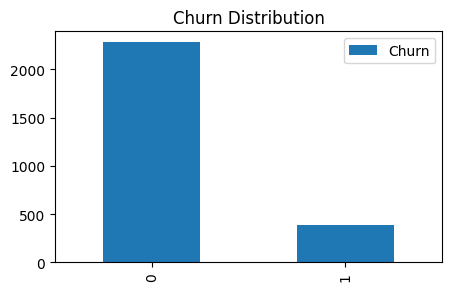

In [9]:
# Create a bar chart to show the distribution of churn 
train["Churn"].value_counts().plot(kind="bar",
                                title="Churn Distribution",
                                legend=True,
                                figsize=(5,3));

In [10]:
#counts the number of customers for each churn status
train["Churn"].value_counts()

0    2278
1     388
Name: Churn, dtype: int64

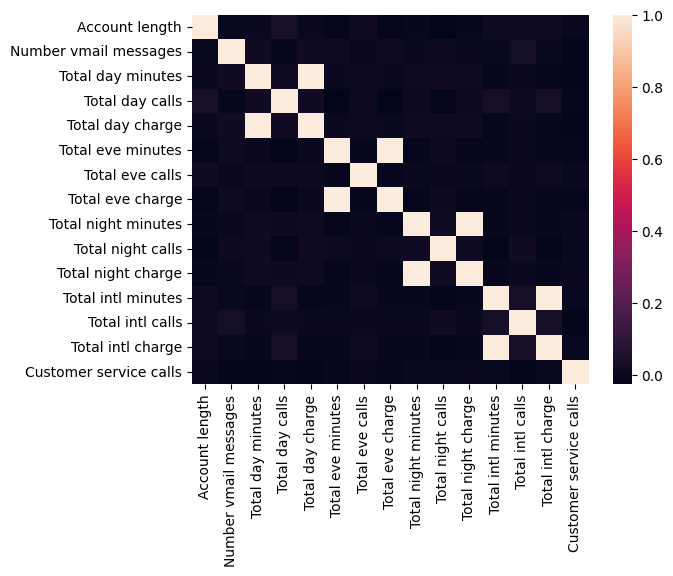

In [11]:
#correlations of quantitative features with each other.
corr_matrix = train.drop(["State", "Area code", "International plan", "Voice mail plan", "Churn"], 
                      axis=1).corr()
seaborn.heatmap(data=corr_matrix);

- These features are calculated based on the total call duration within each corresponding time period.
- The following four features can be removed from the dataset: total_day_charge, total_eve_charge, total_night_charge, and total_intl_charge.

In [12]:
train.drop(["Total day charge", "Total eve charge", "Total night charge", "Total intl charge"], 
        axis=1, inplace=True)

List of Numerical featues ['Total intl minutes', 'Total day minutes', 'Account length', 'Number vmail messages', 'Total eve minutes', 'Total day calls', 'Total eve calls', 'Total intl calls', 'Customer service calls', 'Total night minutes', 'Total night calls']


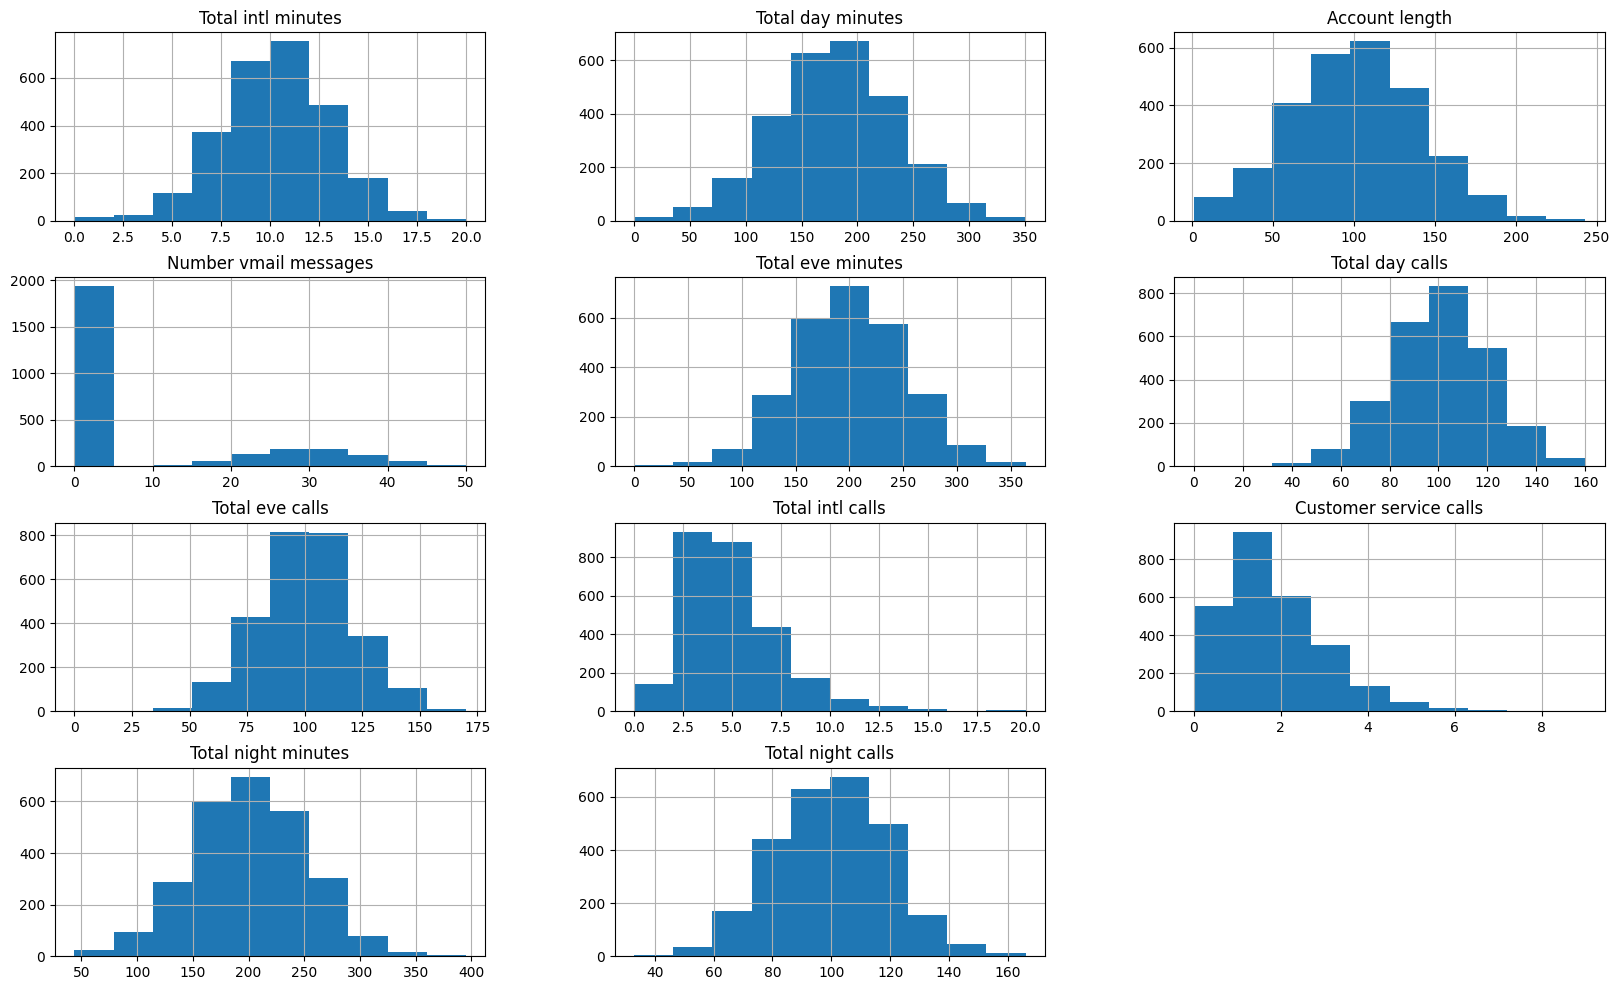

In [13]:
# Extract the numerical features from the dataset
features = list(set(train.columns) - set(["State", "Area code", "International plan", 
                                       "Voice mail plan", "Churn"]))
train[features].hist(figsize=(20,12));
print('List of Numerical featues {}'.format(features))

- Most of the features are normally distributed, with the exceptions of:number_customer_service_calls,number_vmail_messages,total_intl_calls

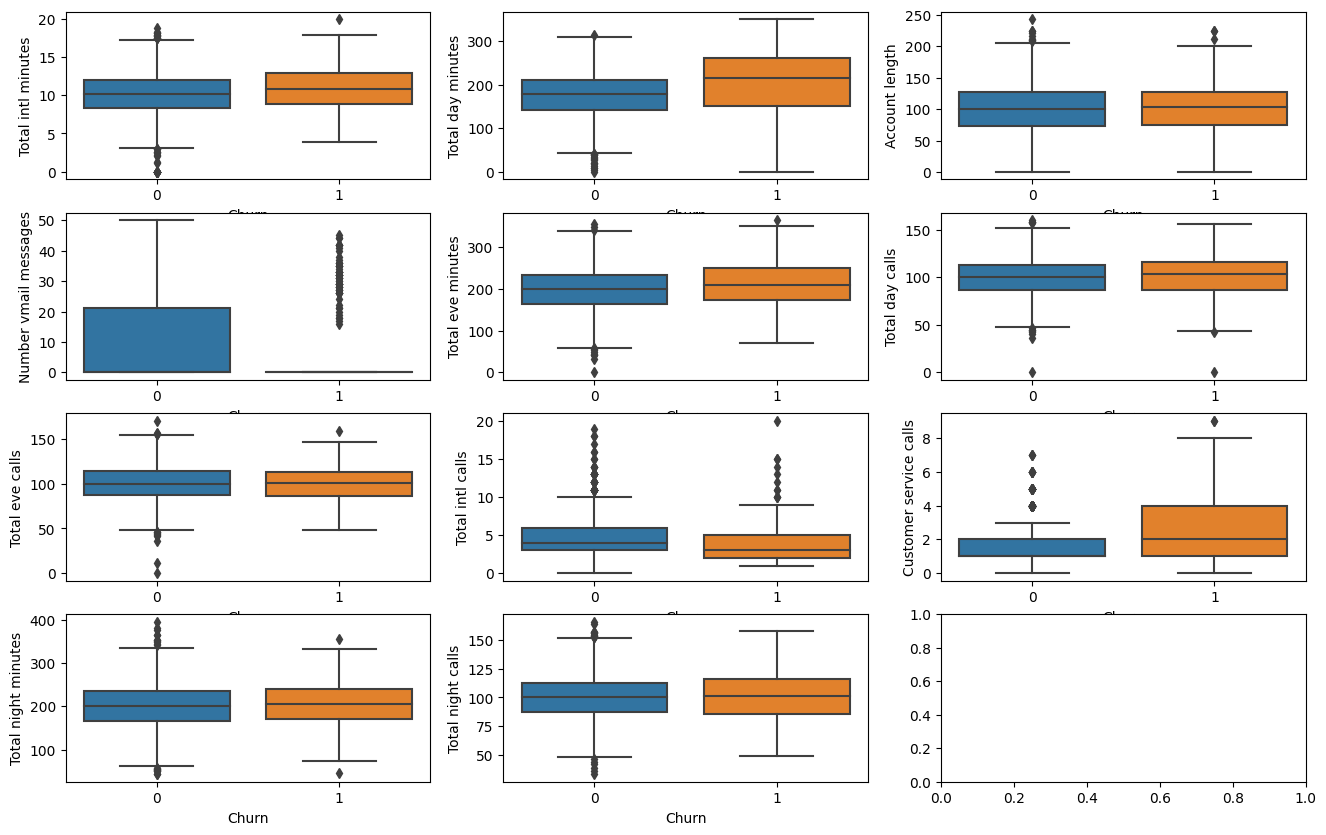

In [14]:
#create boxplots to visualize the distribution of quantitative features
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(16, 10))

for count, feature in enumerate(features):
    seaborn.boxplot(data=train, x="Churn", y=feature, ax=axes[int(count / 3), count % 3])
    axes[int(count / 3), count % 3].set_xlabel("Churn")
    axes[int(count / 3), count % 3].set_ylabel(feature);

In [15]:
#functions for removing outliers
def remove_outliers(train,labels):
    for label in labels:
        q1 = train[label].quantile(0.25)
        q3 = train[label].quantile(0.75)
        iqr = q3 - q1
        upper_bound = q3 + 1.5 * iqr
        lower_bound = q1 - 1.5 * iqr
        train[label] = train[label].mask(train[label]< lower_bound, train[label].median(),axis=0)
        train[label] = train[label].mask(train[label]> upper_bound, train[label].median(),axis=0)

    return train

In [16]:
# remove outliers
train = remove_outliers(train, features)

### Data visualization

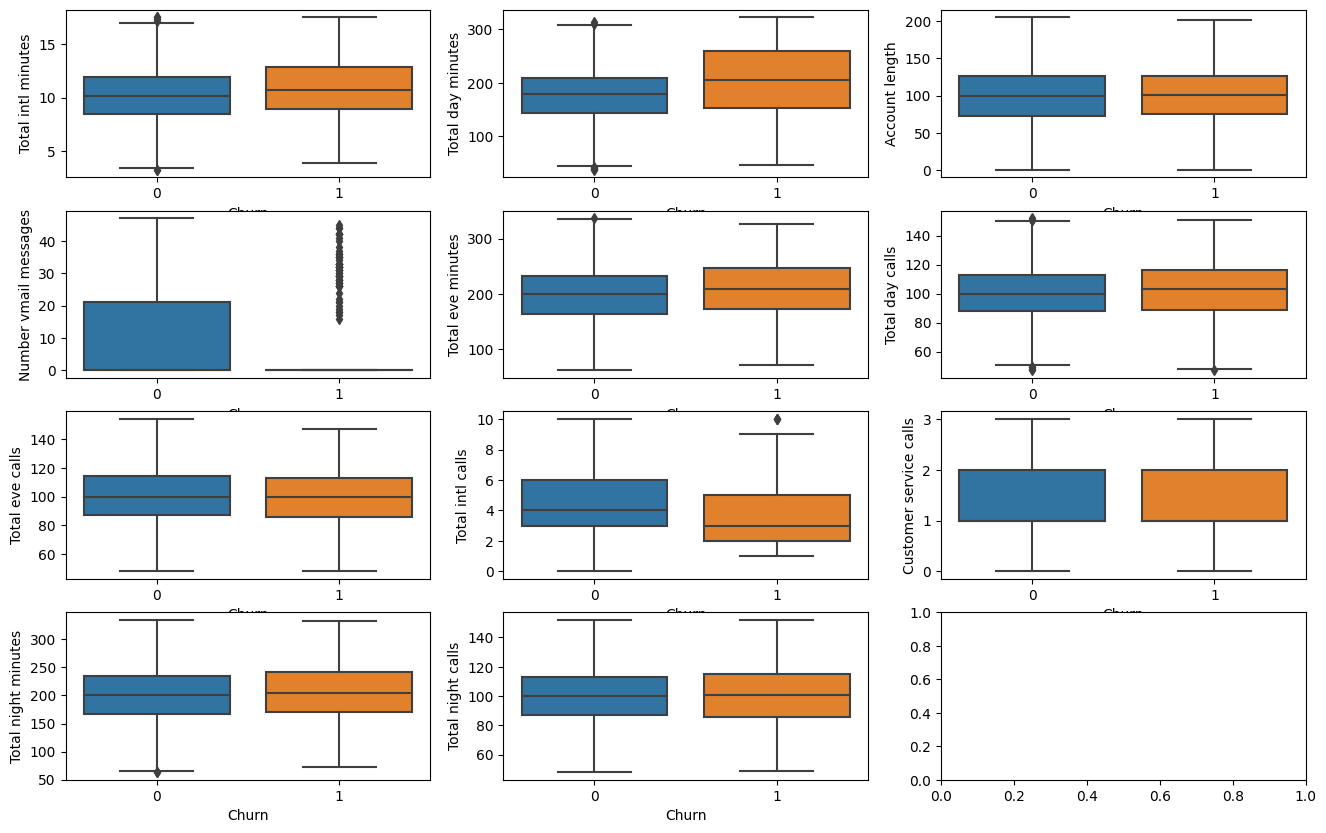

In [17]:
#boxplots to visualize the distribution of quantitative features after remove outliers
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(16, 10))

for count, feature in enumerate(features):
    seaborn.boxplot(data=train, x="Churn", y=feature, ax=axes[int(count / 3), count % 3])
    axes[int(count / 3), count % 3].set_xlabel("Churn")
    axes[int(count / 3), count % 3].set_ylabel(feature);

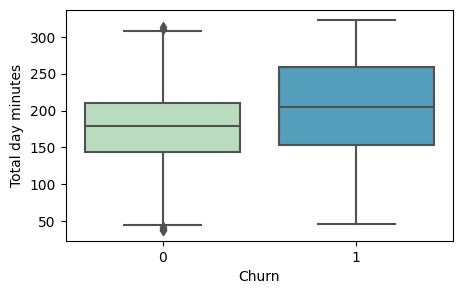

In [18]:
#the distribution of total daytime call duration (total_day_minutes) among loyal and churned customers
plt.figure(figsize=(5,3))
seaborn.boxplot(data=train, x="Churn", y="Total day minutes",palette='GnBu');

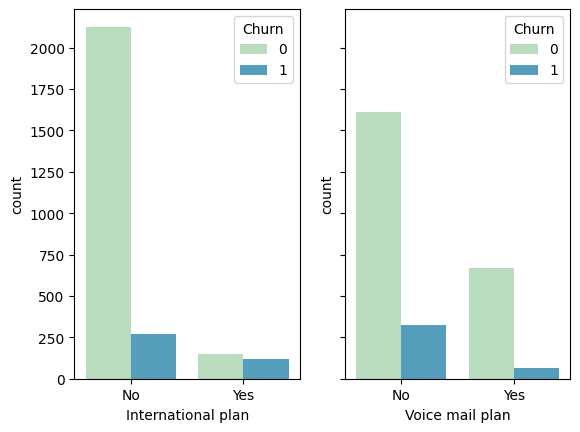

In [19]:
#Create the first countplot for 'international_plan' with hue 'churn'
#Create the second  countplot for 'voice_mail_plan' with hue 'churn'
fig, axes = plt.subplots(nrows=1, ncols=2, sharey=True)
seaborn.countplot(data=train, x="International plan", hue="Churn", ax=axes[0],palette='GnBu')
seaborn.countplot(data=train, x="Voice mail plan", hue="Churn", ax=axes[1],palette='GnBu');

- It is clear that the churn rate is significantly higher when international roaming (international_plan) is enabled. This indicates that having international roaming is a strong predictor of churn, which is not the case for voicemail (voice_mail_plan)

In [20]:
#Convert the binary feature international_plan to an integer type.
train["International plan"] = train["International plan"].map({"No": 0, "Yes": 1})
#Remove the feature voice_mail_plan as it does not have any significance for the project.
train.drop("Voice mail plan", axis=1, inplace=True)

In [21]:
#Drop the feature State and Area code as it does not have any significance for the project.
train.drop(["State", "Area code"], axis=1, inplace=True)

In [22]:
# Load test
test = pd.read_csv("churn-bigml-20.csv")

In [23]:
print('Shape of Test Data: ',test.shape)

Shape of Test Data:  (667, 20)


In [24]:
# Displays summary information about the DataFrame
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 667 entries, 0 to 666
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   667 non-null    object 
 1   Account length          667 non-null    int64  
 2   Area code               667 non-null    int64  
 3   International plan      667 non-null    object 
 4   Voice mail plan         667 non-null    object 
 5   Number vmail messages   667 non-null    int64  
 6   Total day minutes       667 non-null    float64
 7   Total day calls         667 non-null    int64  
 8   Total day charge        667 non-null    float64
 9   Total eve minutes       667 non-null    float64
 10  Total eve calls         667 non-null    int64  
 11  Total eve charge        667 non-null    float64
 12  Total night minutes     667 non-null    float64
 13  Total night calls       667 non-null    int64  
 14  Total night charge      667 non-null    fl

In [25]:
# describe the five points of statistics of numericals data
test.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000
mean,102.841079,436.157421,8.407796,180.948126,100.937031,30.761769,203.355322,100.476762,17.285262,199.685307,100.113943,8.985907,10.238381,4.527736,2.764948,1.563718
std,40.819480,41.783305,13.994480,55.508628,20.396790,9.436463,49.719268,18.948262,4.226160,49.759931,20.172505,2.239429,2.807850,2.482442,0.758167,1.333357
min,1.000000,408.000000,0.000000,25.900000,30.000000,4.400000,48.100000,37.000000,4.090000,23.200000,42.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,76.000000,408.000000,0.000000,146.250000,87.500000,24.860000,171.050000,88.000000,14.540000,167.950000,86.000000,7.560000,8.600000,3.000000,2.320000,1.000000
50%,102.000000,415.000000,0.000000,178.300000,101.000000,30.310000,203.700000,101.000000,17.310000,201.600000,100.000000,9.070000,10.500000,4.000000,2.840000,1.000000
75%,128.000000,415.000000,20.000000,220.700000,115.000000,37.520000,236.450000,113.000000,20.095000,231.500000,113.500000,10.420000,12.050000,6.000000,3.255000,2.000000
max,232.000000,510.000000,51.000000,334.300000,165.000000,56.830000,361.800000,168.000000,30.750000,367.700000,175.000000,16.550000,18.300000,18.000000,4.940000,8.000000


In [26]:
# Check for missing values
test.isna().sum()

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

In [27]:
# Convert the values in the "Churn" column from True/False to 1/0.
test["Churn"] = test["Churn"].apply(lambda x: 1 if x else 0)

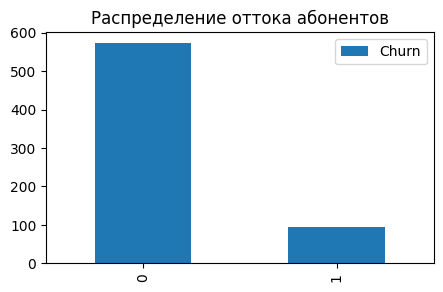

In [28]:
#Create a bar chart to show the distribution of churn 
test["Churn"].value_counts().plot(kind="bar",
                                title="Распределение оттока абонентов",
                                legend=True,
                                figsize=(5,3));

In [29]:
test["Churn"].value_counts()

0    572
1     95
Name: Churn, dtype: int64

In [30]:
#Convert the binary feature international_plan to an integer type.
test["International plan"] = test["International plan"].map({"No": 0, "Yes": 1})

In [31]:
#Function split data
def divide_dataset(df: pd.DataFrame, target: str) -> Tuple[pd.DataFrame, 
                                                           pd.Series, 
                                                           pd.DataFrame, 
                                                           pd.Series]:
    """Splits the dataset into a training set and a test set.
    
    Args:
         df: The DataFrame to split.
        target: The name of the target variable.
    
    Returns:
        X_train: The training set, features.
        y_train: The training set, target.
        X_test: The test set, features.
        y_test: The test set, target.
    
    """
    
    columns_list = list(df)
    columns_list.remove(target)
    X, y = df[columns_list].copy(), df[target].copy()
    
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
    
    return X_train, y_train, X_test, y_test

### Build Model

In [32]:
#Split Data
target = "Churn"
X_train, y_train, X_val, y_val = divide_dataset(train, target)

#### RandomForest

In [33]:
rfc=RandomForestClassifier(random_state=42)
# Train the model on the training data
rfc.fit(X_train, y_train)
# Make predictions on the validation data
y_pred = rfc.predict(X_val)
# Evaluate the model accuracy on the validation data
print("Accuracy for Random Forest on CV data: ",accuracy_score(y_val,y_pred))

Accuracy for Random Forest on CV data:  0.92125


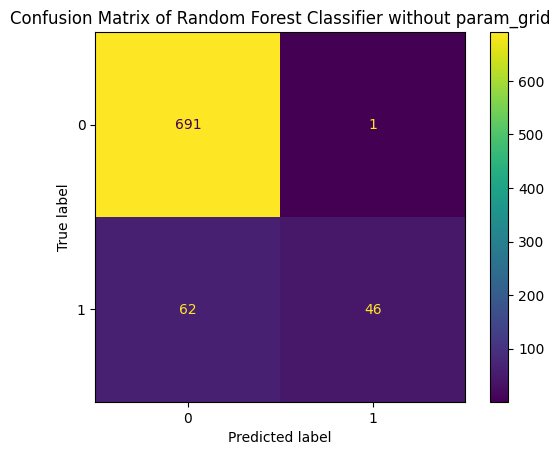

In [34]:
# Calculate the confusion matrix
cm = confusion_matrix(y_val, y_pred, labels=rfc.classes_)
# Create a ConfusionMatrixDisplay object
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rfc.classes_)
# Plot the confusion matrix
disp.plot()
plt.title('Confusion Matrix of Random Forest Classifier without param_grid')
plt.show()

In [35]:
rfc1=RandomForestClassifier(random_state=42)

In [36]:
# Define the hyperparameter grid for GridSearchCV
param_grid = { 
    'n_estimators': [50, 60],    # Number of trees in the forest
    'max_features': [5, 6],      # Maximum number of features considered for splitting a node
    'max_depth' : [19, 20],      # Maximum depth of a tree
    'min_samples_leaf' :[1, 2],  # Minimum number of samples required to be at a leaf node
    'min_samples_split' :[16,17] # Minimum number of samples required to split an internal node
}

In [37]:
# Create a GridSearchCV object
CV_rfc = GridSearchCV(estimator=rfc1, param_grid=param_grid, cv= 5)
# Fit the GridSearchCV object
CV_rfc.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [19, 20], 'max_features': [5, 6],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [16, 17],
                         'n_estimators': [50, 60]})

In [39]:
# Print the best parameters found by GridSearchCV
CV_rfc.best_params_

{'max_depth': 19,
 'max_features': 6,
 'min_samples_leaf': 1,
 'min_samples_split': 17,
 'n_estimators': 50}

In [40]:
# retrain with param_grid
rfc2=RandomForestClassifier(random_state=42, max_features=6, n_estimators= 50, max_depth=19, min_samples_leaf=1,min_samples_split=17)

In [41]:
# Train the model on the training data
rfc2.fit(X_train, y_train)

RandomForestClassifier(max_depth=19, max_features=6, min_samples_split=17,
                       n_estimators=50, random_state=42)

In [42]:
# Make predictions on the validation data
pred=rfc2.predict(X_val)
print("Accuracy for Random Forest on CV data: ",accuracy_score(y_val,pred))

Accuracy for Random Forest on CV data:  0.92375


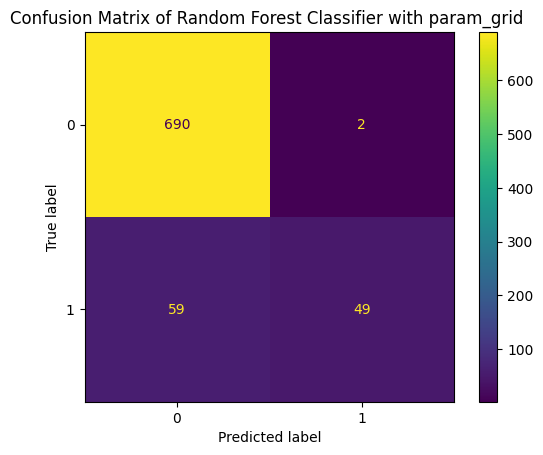

In [43]:
# Plot the confusion matrix of Random Forest Classifier with param_grid
cm = confusion_matrix(y_val, pred, labels=rfc2.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rfc2.classes_)
disp.plot()
plt.title('Confusion Matrix of Random Forest Classifier with param_grid ')
plt.show()

In [44]:
train_cols = list(train.columns[:-1])
train_cols

['Account length',
 'International plan',
 'Number vmail messages',
 'Total day minutes',
 'Total day calls',
 'Total eve minutes',
 'Total eve calls',
 'Total night minutes',
 'Total night calls',
 'Total intl minutes',
 'Total intl calls',
 'Customer service calls']

In [45]:
# Prepare the test data
test_df = test[train_cols]
# Make predictions on the test data
op_rf=rfc2.predict(test_df)
op_rf

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

#### DecisionTree

In [46]:
cls=DecisionTreeClassifier(random_state=42)
# Train the model on the training data
cls.fit(X_train, y_train)
# Make predictions on the validation data
y_pred = cls.predict(X_val)
print("Accuracy for Decision Tree on CV data: ",accuracy_score(y_val,y_pred))

Accuracy for Decision Tree on CV data:  0.85875


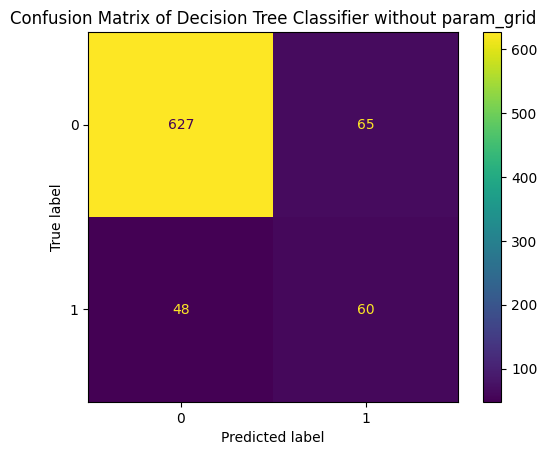

In [47]:
#Calculate the confusion matrix
cm = confusion_matrix(y_val, y_pred, labels=cls.classes_)
# Create a ConfusionMatrixDisplay object
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=cls.classes_)
# Plot the confusion matrix
disp.plot()
# Set the title of the plot
plt.title('Confusion Matrix of Decision Tree Classifier without param_grid')
plt.show()

In [48]:
cls1=DecisionTreeClassifier(random_state=42)

In [49]:
#Define the hyperparameter grid for a Decision Tree Classifier
param_grid_cls = { 
    'max_depth' : [6, 7],          # Maximum depth of a tree       
    'max_features': [10, 11],      # Maximum number of features considered for splitting a node
    'min_samples_leaf' :[8, 9],     # Minimum number of samples required to be at a leaf node
    'min_samples_split' :[2, 3]    # Minimum number of samples required to split an internal node
}

In [50]:
# Create a GridSearchCV object
CV_cls = GridSearchCV(estimator=cls1, param_grid=param_grid_cls, cv= 5)
# Fit the GridSearchCV object
CV_cls.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [6, 7], 'max_features': [10, 11],
                         'min_samples_leaf': [8, 9],
                         'min_samples_split': [2, 3]})

In [51]:
#Print the best parameters found by GridSearchCV
CV_cls.best_params_

{'max_depth': 6,
 'max_features': 10,
 'min_samples_leaf': 8,
 'min_samples_split': 2}

In [52]:
# Retrain model with param_grid_cls
cls2=DecisionTreeClassifier(random_state=42, max_features=10, max_depth=6, min_samples_leaf=8,min_samples_split=2)

In [53]:
# Train the model on the training data
cls2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, max_features=10, min_samples_leaf=8,
                       random_state=42)

In [54]:
# Make predictions on the validation data
pred=cls2.predict(X_val)
print("Accuracy for Decision Tree on CV data: ",accuracy_score(y_val,pred))

Accuracy for Decision Tree on CV data:  0.9175


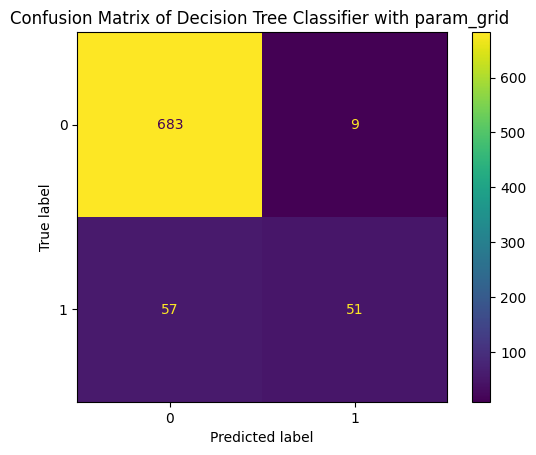

In [55]:
# Calculate the confusion matrix
cm = confusion_matrix(y_val, pred, labels=cls2.classes_)
# Create a ConfusionMatrixDisplay object
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=cls2.classes_)
# Plot the confusion matrix
disp.plot()
# Set the title of the plot
plt.title('Confusion Matrix of Decision Tree Classifier with param_grid ')
plt.show()

In [56]:
# Make predictions on the test data
op_cls=cls2.predict(test_df)
op_cls

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

#### Conclusion

- After parameter tuning, both RandomForestClassifier and Decision Tree models achieved an accuracy of 91%. 
- RandomForestClassifier has lower computational demands and allows parallel tree construction, it would be a better choice in this case.